#**Ice Cream Sales Prediction Notebook**

##Understanding Regression Evaluation Metrics
###Python (numpy, matplotlib, scikit-learn)

In [1]:
# First, let's set up our ice cream sales data
import numpy as np

temperature = np.array([70, 75, 80, 85, 90])  # in °F
sales = np.array([20, 25, 30, 35, 40])         # ice creams sold

print("When temperature goes up, sales go up:")
for temp, sale in zip(temperature, sales):
    print(f"{temp}°F → {sale} ice creams")

When temperature goes up, sales go up:
70°F → 20 ice creams
75°F → 25 ice creams
80°F → 30 ice creams
85°F → 35 ice creams
90°F → 40 ice creams


###**1. Why We Need Evaluation Metrics**
Imagine you're the ice cream shop manager. You want to know:

How good are our temperature-based predictions?

How many extra ice creams should we prepare?

Is temperature really the main factor affecting sales?

That's what these metrics tell us!



###**2. The Four Key Metrics (Simplified)**

In [2]:
# Let's say our predictions were slightly off
predicted = np.array([22, 25, 28, 33, 38])
errors = sales - predicted

print("\nOur predictions vs reality:")
for temp, real, pred in zip(temperature, sales, predicted):
    print(f"{temp}°F: Predicted {pred}, Actual {real} → Error {real-pred}")


Our predictions vs reality:
70°F: Predicted 22, Actual 20 → Error -2
75°F: Predicted 25, Actual 25 → Error 0
80°F: Predicted 28, Actual 30 → Error 2
85°F: Predicted 33, Actual 35 → Error 2
90°F: Predicted 38, Actual 40 → Error 2


####**Metric 1: MAE (Mean Absolute Error)**
"How many ice creams are we usually off by?"

In [3]:
mae = np.mean(np.abs(errors))
print(f"\nMAE: {mae:.1f} ice creams")
print("This means on average, we're off by", mae, "ice creams per day")


MAE: 1.6 ice creams
This means on average, we're off by 1.6 ice creams per day


**Example:**
If MAE is 1.5, we'll prepare 1-2 extra ice creams daily "just in case"

####**Metric 2: MSE (Mean Squared Error)**
"Are we making any huge mistakes?"

In [4]:
mse = np.mean(errors**2)
print(f"\nMSE: {mse:.1f}")
print("Big errors (like being off by 3) hurt more than small ones (off by 1)")


MSE: 3.2
Big errors (like being off by 3) hurt more than small ones (off by 1)


**Why?**

Being off by 1 → 1² = 1

Being off by 3 → 3² = 9 (much worse!)

####**Metric 3: RMSE (Root Mean Squared Error)**
"MSE but back to ice cream numbers"

In [5]:
rmse = np.sqrt(mse)
print(f"\nRMSE: {rmse:.1f} ice creams")
print("Similar to MAE, but gives more weight to bad days")


RMSE: 1.8 ice creams
Similar to MAE, but gives more weight to bad days


**Shop Use:**
If RMSE is 2, most days we're within ±2 ice creams

####**Metric 4: R-squared (R²)**
"Does temperature really explain sales?"

In [6]:
# Calculate R² manually for understanding
mean_sales = np.mean(sales)
total_variance = np.sum((sales - mean_sales)**2)
explained_variance = total_variance - np.sum(errors**2)
r2 = explained_variance / total_variance

print(f"\nR²: {r2:.2f}")
print(f"{r2*100:.0f}% of sales changes are explained by temperature")
print("0% = random guessing, 100% = perfect prediction")


R²: 0.94
94% of sales changes are explained by temperature
0% = random guessing, 100% = perfect prediction


###**3. Complete Evaluation Code**

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\nProfessional Calculation:")
print("MAE:", mean_absolute_error(sales, predicted))
print("MSE:", mean_squared_error(sales, predicted))
print("RMSE:", np.sqrt(mean_squared_error(sales, predicted)))
print("R²:", r2_score(sales, predicted))


Professional Calculation:
MAE: 1.6
MSE: 3.2
RMSE: 1.7888543819998317
R²: 0.9359999999999999


###**4. Visualization**

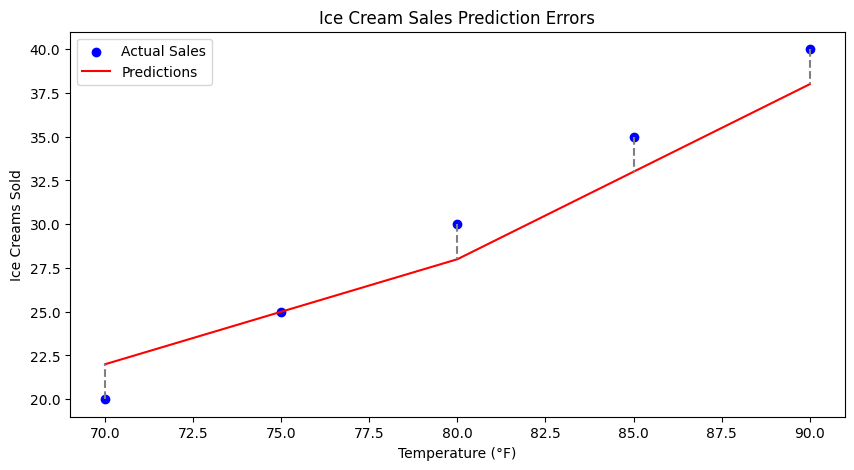

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(temperature, sales, label='Actual Sales', color='blue')
plt.plot(temperature, predicted, label='Predictions', color='red')

# Add error lines
for t, s, p in zip(temperature, sales, predicted):
    plt.plot([t, t], [s, p], color='gray', linestyle='--')

plt.title("Ice Cream Sales Prediction Errors")
plt.xlabel("Temperature (°F)")
plt.ylabel("Ice Creams Sold")
plt.legend()
plt.show()

## **Key Takeaways Cheat Sheet**

| Metric | What It Answers | Good For |
|--------|-----------------|----------|
| **MAE** | "How many ice creams are we usually off by?" | Daily preparation |
| **MSE** | "Are we making any huge mistakes?" | Finding problem days |
| **RMSE** | "MAE but worse mistakes count more" | Balanced view |
| **R²** | "Is temperature really controlling sales?" | Model usefulness |
